#**Intro**

In [ ]:
!nvidia-smi

Tue Dec 29 09:22:30 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.27.04    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P8    12W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
__author__ = 'ALok Mondal, mondalalok@eisti.eu'

In [ ]:
!pip install -q keras

#Read file and import library

mount drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,f1_score,precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import RandomOverSampler,SMOTE
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
import keras

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
fraud = pd.read_csv('/content/gdrive/MyDrive/application_data.csv')

In [ ]:
data1 = fraud.copy()

In [ ]:
fraud.head

In [ ]:
fraud.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,...,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,...,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,...,0.149213,0.225897,0.231625,0.067169,0.101954,0.108607,0.008651,0.028236,0.102547,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,11.944812,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,0.211062,1.910602e-01,0.194844,0.10824,0.082438,0.059223,0.113280,0.076036,0.134576,0.100049,0.144641,...,0.100368,0.145067,0.161934,0.082167,0.093642,0.112260,0.047415,0.070166,0.107462,2.400989,0.446698,2.379803,0.362291,826.808487,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,

Check missing **data**

In [ ]:
total = fraud.isnull().sum().sort_values(ascending = False)
percent = (fraud.isnull().sum()/fraud.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,COMMONAREA_MEDI,COMMONAREA_AVG,COMMONAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAPARTMENTS_AVG,FONDKAPREMONT_MODE,LIVINGAPARTMENTS_MEDI,LIVINGAPARTMENTS_MODE,LIVINGAPARTMENTS_AVG,FLOORSMIN_MEDI,FLOORSMIN_MODE,FLOORSMIN_AVG,YEARS_BUILD_MEDI,YEARS_BUILD_AVG,YEARS_BUILD_MODE,OWN_CAR_AGE,LANDAREA_MODE,LANDAREA_AVG,LANDAREA_MEDI,BASEMENTAREA_MEDI,BASEMENTAREA_AVG,BASEMENTAREA_MODE,EXT_SOURCE_1,NONLIVINGAREA_MEDI,NONLIVINGAREA_AVG,NONLIVINGAREA_MODE,ELEVATORS_MODE,ELEVATORS_AVG,ELEVATORS_MEDI,WALLSMATERIAL_MODE,APARTMENTS_MODE,APARTMENTS_AVG,APARTMENTS_MEDI,ENTRANCES_MEDI,ENTRANCES_MODE,ENTRANCES_AVG,LIVINGAREA_MEDI,LIVINGAREA_MODE,LIVINGAREA_AVG,...,DAYS_EMPLOYED,DAYS_BIRTH,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,CNT_CHILDREN,NAME_HOUSING_TYPE,REG_REGION_NOT_LIVE_REGION,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,ORGANIZATION_TYPE,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,REG_CITY_NOT_LIVE_CITY,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,HOUR_APPR_PROCESS_START,SK_ID_CURR
Total,214865.000000,214865.000000,214865.000000,213514.000000,213514.000000,213514.000000,210295.000000,210199.000000,210199.000000,210199.000000,208642.00000,208642.00000,208642.00000,204488.000000,204488.000000,204488.000000,202929.00000,182590.000000,182590.000000,182590.000000,179943.000000,179943.000000,179943.000000,173378.000000,169682.000000,169682.000000,169682.000000,163891.00000,163891.00000,163891.00000,156341.000000,156061.000000,156061.000000,156061.000000,154828.000000,154828.000000,154828.000000,154350.000000,154350.000000,154350.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,69.872297,69.872297,69.872297,69.432963,69.432963,69.432963,68.386172,68.354953,68.354953,68.354953,67.84863,67.84863,67.84863,66.497784,66.497784,66.497784,65.99081,59.376738,59.376738,59.376738,58.515956,58.515956,58.515956,56.381073,55.179164,55.179164,55.179164,53.29598,53.29598,53.29598,50.840783,50.749729,50.749729,50.749729,50.348768,50.348768,50.348768,50.193326,50.193326,50.193326,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#**Object Type Values**

In [ ]:
print("Object type values:",np.count_nonzero(fraud.select_dtypes('object').columns))
print("")
print(fraud.select_dtypes('object').columns)

Object type values: 16

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')


label Encoding Of object data type of values

In [ ]:
le = LabelEncoder()
fraud['NAME_CONTRACT_TYPE'] = le.fit_transform(fraud['NAME_CONTRACT_TYPE'])
fraud['CODE_GENDER'] = le.fit_transform(fraud['CODE_GENDER'])
fraud['FLAG_OWN_CAR'] = le.fit_transform(fraud['FLAG_OWN_CAR'])
fraud['FLAG_OWN_REALTY'] = le.fit_transform(fraud['FLAG_OWN_REALTY'])
fraud['NAME_TYPE_SUITE'] = le.fit_transform(fraud['NAME_TYPE_SUITE'].astype(str))
fraud['NAME_INCOME_TYPE'] = le.fit_transform(fraud['NAME_INCOME_TYPE'])
fraud['NAME_EDUCATION_TYPE'] = le.fit_transform(fraud['NAME_EDUCATION_TYPE'])
fraud['NAME_FAMILY_STATUS'] = le.fit_transform(fraud['NAME_FAMILY_STATUS'])
fraud['NAME_HOUSING_TYPE'] = le.fit_transform(fraud['NAME_HOUSING_TYPE'])
fraud['OCCUPATION_TYPE'] = le.fit_transform(fraud['OCCUPATION_TYPE'].astype(str))
fraud['WEEKDAY_APPR_PROCESS_START'] = le.fit_transform(fraud['WEEKDAY_APPR_PROCESS_START'])
fraud['ORGANIZATION_TYPE'] = le.fit_transform(fraud['ORGANIZATION_TYPE'])
fraud['FONDKAPREMONT_MODE'] = le.fit_transform(fraud['FONDKAPREMONT_MODE'].astype(str))
fraud['HOUSETYPE_MODE'] = le.fit_transform(fraud['HOUSETYPE_MODE'].astype(str))
fraud['WALLSMATERIAL_MODE'] = le.fit_transform(fraud['WALLSMATERIAL_MODE'].astype(str))
fraud['EMERGENCYSTATE_MODE'] = le.fit_transform(fraud['EMERGENCYSTATE_MODE'].astype(str))

Missing Value Detection of objet data type values

In [ ]:
def colors(value):
    if value > 50 and value < 100:
        color = 'red'
    elif value > 154000 and value < 250000:
        color = 'red'
    elif value == 1 :
        color = 'blue'
    else:
        color = 'green'
    return 'color: %s' % color

def missing(fraud):
    total = fraud.isnull().sum().sort_values(ascending = False)
    total = total[total>0]
    percent = fraud.isnull().sum().sort_values(ascending = False)/len(fraud)*100
    percent = percent[percent>0]
    return pd.concat([total, percent], axis=1, keys=['Total','Percentage']).style.applymap(colors)
missing(data1.select_dtypes('object'))

,Total,Percentage
FONDKAPREMONT_MODE,210295,68.386172
WALLSMATERIAL_MODE,156341,50.840783
HOUSETYPE_MODE,154297,50.176091
EMERGENCYSTATE_MODE,145755,47.398304
OCCUPATION_TYPE,96391,31.345545
NAME_TYPE_SUITE,1292,0.420148


In [ ]:
def mode_impute(fraud,col):
    return fraud[col].fillna(fraud[col].mode()[0])
data1['FONDKAPREMONT_MODE'] = mode_impute(data1,'FONDKAPREMONT_MODE')
data1['WALLSMATERIAL_MODE'] = mode_impute(data1,'WALLSMATERIAL_MODE')
data1['HOUSETYPE_MODE'] = mode_impute(data1,'HOUSETYPE_MODE')
data1['EMERGENCYSTATE_MODE'] = mode_impute(data1,'EMERGENCYSTATE_MODE')
data1['OCCUPATION_TYPE'] = mode_impute(data1,'OCCUPATION_TYPE')
data1['NAME_TYPE_SUITE'] = mode_impute(data1,'NAME_TYPE_SUITE')
missing(data1.select_dtypes('object'))

,Total,Percentage


In [ ]:
data1.describe(include=['O'])

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
count,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511
unique,2,3,2,2,7,8,5,6,6,18,7,58,4,3,7,2
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3,reg oper account,block of flats,Panel,No
freq,278232,202448,202924,213312,249818,158774,218391,196432,272868,151577,53901,67992,284125,304800,222381,305183


#**Integer Type Value**

In [ ]:
print("Int type values:",np.count_nonzero(data1.select_dtypes('int').columns))
print(" ")
print(fraud.select_dtypes('int').columns)

Int type values: 41
 
Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE',
       'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
       'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUME

Missing value detection of integer data type

In [ ]:
missing(data1.select_dtypes('int'))

,Total,Percentage


**Descriptive Statistics**

In [ ]:
data1.select_dtypes('int').agg(['count','min', 'max','mad','mean','median','quantile','kurt','skew','var','std'])

,SK_ID_CURR,TARGET,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
count,3.075110e+05,307511.000000,307511.000000,3.075110e+05,3.075110e+05,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
min,1.000020e+05,0.000000,0.000000,-2.522900e+04,-1.791200e+04,-7.197000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.562550e+05,1.000000,19.000000,-7.489000e+03,3.652430e+05,0.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
mad,8.901023e+04,0.148423,0.584180,3.728372e+03,1.085572e+05,1.316243e+03,0.000007,0.295342,0.319241,0.003726,0.404136,0.107006,0.297839,0.276267,2.632820,0.029830,0.096383,0.078011,0.144124,0.354689,0.294629,0.000085,0.411780,0.000163,0.029773,0.160603,0.000384,0.149508,0.007761,0.000046,0.007794,0.000013,0.007025,0.005856,0.002416,0.019659,0.000533,0.016127,0.001189,0.001014,0.000670
mean,2.781805e+05,0.080729,0.417052,-1.603700e+04,6.381505e+04,-2.994202e+03,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.001210,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335
median,2.782020e+05,0.000000,0.000000,-1.575000e+04,-1.213000e+03,-3.254000e+03,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
quantile,2.782020e+05,0.000000,0.000000,-1.575000e+04,-1.213000e+03,-3.254000e+03,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
kurt,-1.198988e+00,7.475109,7.904106,-1.049126e+00,7.716124e-01,-1.106808e+00,307511.000000,0.771852,0.264876,530.743969,-1.051170,12.690846,0.800416,0.933584,-0.194173,61.048384,14.750836,19.637698,7.877121,-0.361250,0.788220,23650.076908,-1.143041,12295.640022,61.176215,6.453171,5207.135724,7.377367,251.695001,43925.857112,250.628138,153752.999974,2

Outlier Detection



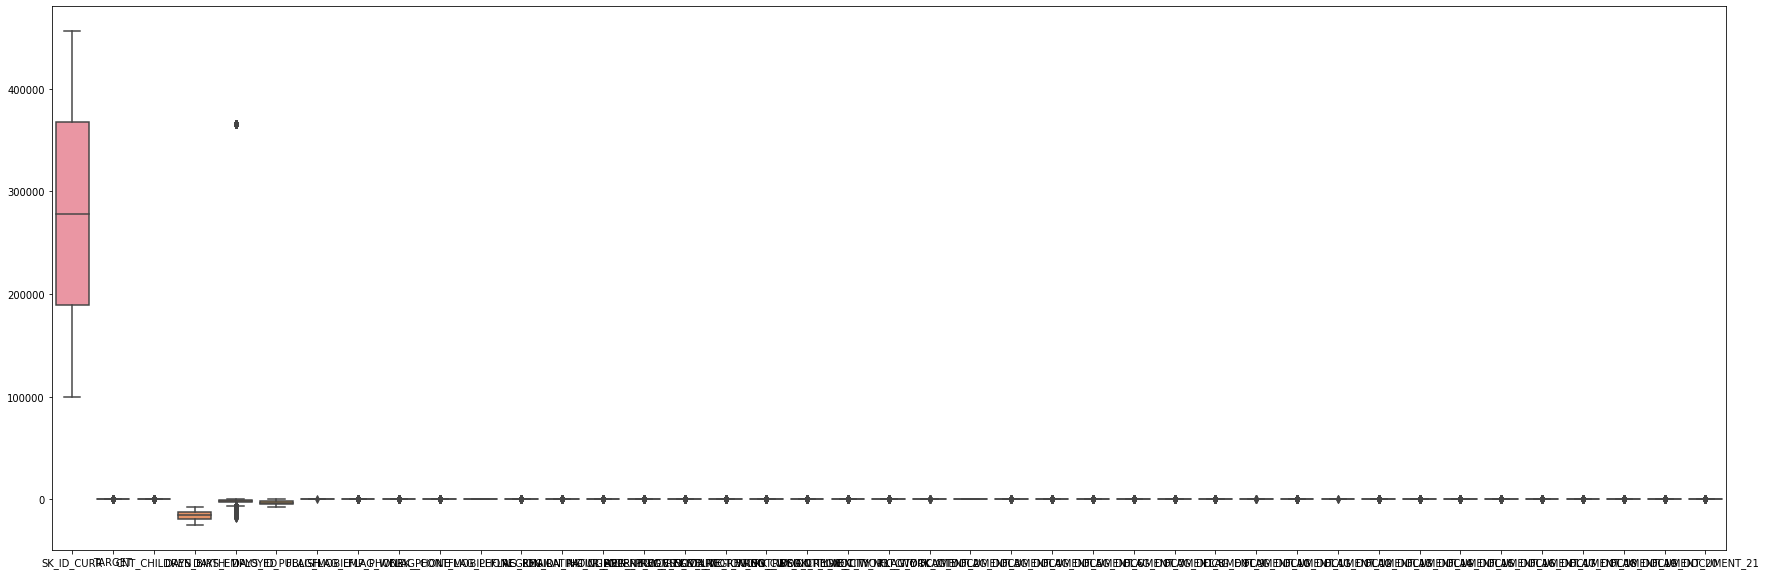

In [ ]:
plt.figure(figsize=(30,10))
sns.boxplot(data=data1.select_dtypes('int'))
plt.show()

**Checking Distribution of variables using Histogram**

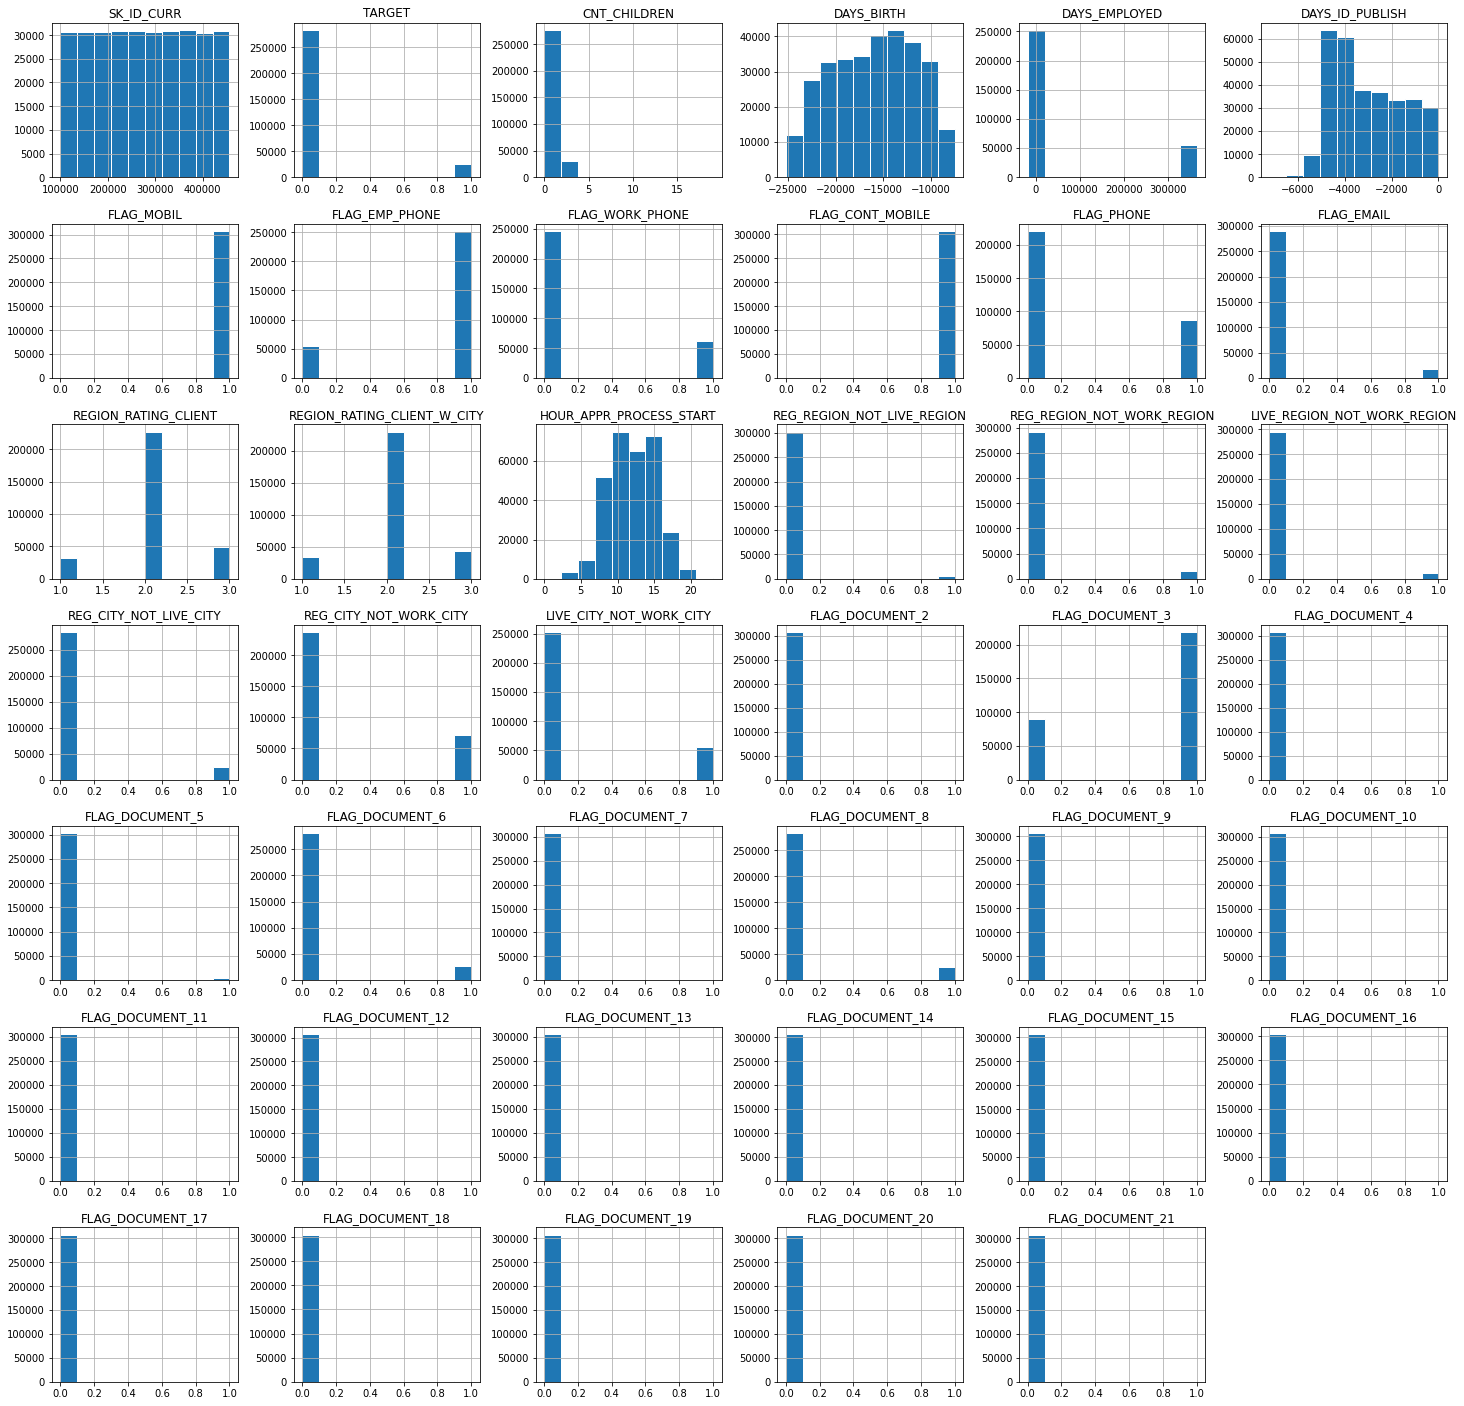

In [ ]:
data1.select_dtypes('int').hist(figsize=(25,25), ec='w')
plt.show()

Relation Between Variables

In [ ]:
def color_(value):
    if value < 0 :
        color = 'green'
    elif value == 1 :
        color = 'Red'
    else:
        color = 'white'
    return 'color: %s' % color
data1.select_dtypes('int').corr().style.applymap(color_)

,SK_ID_CURR,TARGET,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
SK_ID_CURR,1.000000,-0.002108,-0.001129,-0.001500,0.001366,-0.000384,0.002804,-0.001337,-0.000415,0.002815,0.002753,0.000281,-0.001075,-0.001138,0.000350,-0.000283,0.001097,0.002903,-0.001885,-0.001582,0.000067,0.000700,-0.003411,-0.004139,-0.001097,0.002121,-0.002694,0.001809,0.001505,-0.000815,-0.002012,-0.001045,0.000896,-0.001077,0.002604,-0.000724,0.001450,0.000509,0.000167,0.001073,0.000282
TARGET,-0.002108,1.000000,0.019187,0.078239,-0.044932,0.051457,0.000534,0.045982,0.028524,0.000370,-0.023806,-0.001758,0.058899,0.060893,-0.024166,0.005576,0.006942,0.002819,0.044395,0.050994,0.032518,0.005417,0.044346,-0.002672,-0.000316,-0.028602,-0.001520,-0.008040,-0.004352,-0.001414,-0.004229,-0.000756,-0.011583,-0.009464,-0.006536,-0.011615,-0.003378,-0.007952,-0.001358,0.000215,0.003709
CNT_CHILDREN,-0.001129,0.019187,1.000000,0.330938,-0.239818,-0.028019,0.001041,0.240714,0.055630,-0.000794,-0.029906,0.022619,0.025423,0.024781,-0.007292,-0.013319,0.008185,0.014835,0.020072,0.070650,0.069957,0.001786,0.056837,-0.003709,-0.016737,-0.157024,-0.001498,0.051697,-0.001997,-0.002756,-0.005318,0.000293,0.003945,-0.005459,0.003609,0.010662,0.000773,0.004031,0.000864,0.000988,-0.002450
DAYS_BIRTH,-0.001500,0.078239,0.330938,1.000000,-0.615864,0.272691,-0.003084,0.619888,0.172457,-0.014985,-0.042402,0.088208,0.009361,0.008073,0.091064,0.065486,0.095819,0.069567,0.180382,0.242401,0.158882,-0.001191,0.109666,-0.002789,0.016774,-0.407160,0.001469,0.113243,0.018213,-0.000168,0.044716,0.000236,0.026333,0.030733,0.012953,0.024044,0.007877,0.044498,0.003614,0.009015,0.027282
DAYS_EMPLOYED,0.001366,-0.044932,-0.239818,-0.615864,1.000000,-0.272378,0.000818,-0.999755,-0.233972,0.012745,0.015291,-0.062112,0.032750,0.034624,-0.091138,-0.035803,-0.107150,-0.095539,-0.090516,-0.254559,-0.218101,-0.003090,-0.249082,0.000437,-0.020041,0.597484,-0.002221,-0.121571,-0.023834,-0.000439,-0.028915,-0.001225,-0.025778,-0.023383,-0.014285,-0.042905,-0.007187,-0.040396,-0.010040,-0.010135,-0.008396
DAYS_ID_PUBLISH,-0.000384,0.051457,-0.028019,0.272691,-0.272378,1.000000,-0.002293,0.273611,0.045964,-0.000802,-0.037660,0.027505,-0.005103,-0.007737,0.031676,0.034757,0.048071,0.033938,0.076326,0.099354,0.061094,-0.000349,0.050309,0.000545,0.002066,-0.178282,-0.000034,0.024065,0.015271,-0.001214,0.022875,-0.002193,0.003048,0.008710,0.000158,0.002782,0.004804,0.014084,0.000903,0.000070,0.017246
FLAG_MOBIL,0.002804,0.000534,0.001041,-0.003084,0.000818,-0.002293,1.000000,-0.000845,0.000900,-0.000078,0.001128,0.000442,0.000186,0.000113,-0.000517,0.000224,0.000417,0.000371,0.000525,0.000987,0.000844,0.000012,0.002822,0.000016,0.000223,0.000560,0.000025,-0.006059,0.000113,0.000009,0.000113,0.000005,0.000107,0.000098,0.000063,0.000181,0.000029,-0.019919,0.000044,0.000041,0.000033
FLAG_EMP_PHONE,-0.001337,0.045982,0.240714,0.619888,-0.999755,0.273611,-0.000845,1.000000,0.233801,-0.012819,-0.016131,0.062542,-0.032871,-0.034712,0.091356,0.036640,0.108355,0.096447,0.092166,0.256427,0.219219,0.003047,0.248534,-0.000467,0.019778,-0.597732,0.001605,0.122043,0.023878,0.000463,0.029373,0.001195,0.025878,0.023559,0.014364,0.043008,0.007136,0.040548,0.010049,0.010183,0.008579
FLAG_WORK_PHONE,-0.000415,0.028524,0.055630,0.172457,-0.233972,0.045964,0.000900,0.233801,1.000000,0.021580,0.29

In [ ]:
data1.select_dtypes('int').cov().style.applymap(color_)

,SK_ID_CURR,TARGET,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
SK_ID_CURR,10565820148.159863,-59.041266,-83.819815,-672773.474806,19840118.340063,-59637.043657,0.519822,-52.792950,-17.026415,12.488786,127.210825,6.675923,-56.230029,-58.787004,117.591486,-3.550655,24.765159,58.934592,-52.006771,-68.495018,2.649812,0.467797,-159.105827,-3.835537,-13.758077,61.789431,-3.835484,50.845908,9.635097,-0.399524,-12.911967,-0.274046,5.460625,-5.991139,9.303135,-7.376408,2.433360,4.698847,0.419252,2.482850,0.531302
TARGET,-59.041266,0.074212,0.003774,93.013383,-1729.246843,21.159315,0.000000,0.004814,0.003105,0.000004,-0.002915,-0.000111,0.008168,0.008340,-0.021500,0.000186,0.000415,0.000152,0.003247,0.005850,0.003400,0.000010,0.005482,-0.000007,-0.000010,-0.002208,-0.000006,-0.000599,-0.000074,-0.000002,-0.000072,-0.000001,-0.000187,-0.000140,-0.000062,-0.000314,-0.000015,-0.000195,-0.000009,0.000001,0.000018
CNT_CHILDREN,-83.819815,0.003774,0.521459,1042.893640,-24465.822569,-30.541355,0.000001,0.066797,0.016050,-0.000025,-0.009708,0.003778,0.009345,0.008997,-0.017197,-0.001175,0.001297,0.002116,0.003891,0.021485,0.019390,0.000008,0.018624,-0.000024,-0.001475,-0.032132,-0.000015,0.010207,-0.000090,-0.000009,-0.000240,0.000001,0.000169,-0.000213,0.000091,0.000763,0.000009,0.000261,0.000015,0.000016,-0.000032
DAYS_BIRTH,-672773.474806,93.013383,1042.893640,19044396.778354,-379696190.460693,1796274.604283,-0.024269,1039.548207,300.683368,-2.822582,-83.179638,89.039361,20.793917,17.712735,1297.854085,34.901210,91.795168,59.958770,211.315113,445.480226,266.122948,-0.033807,217.158095,-0.109750,8.931602,-503.514317,0.088816,135.118092,4.951212,-0.003499,12.181373,0.002628,6.810740,7.257161,1.964798,10.403174,0.561229,17.437894,0.384622,0.885874,2.178571
DAYS_EMPLOYED,19840118.340063,-1729.246843,-24465.822569,-379696190.460693,19958842205.453899,-58084280.383992,0.208475,-54276.179362,-13206.165065,77.720397,971.080210,-2029.700067,2355.208443,2459.141436,-42049.510410,-617.734580,-3323.126489,-2665.695206,-3432.789043,-15144.888706,-11826.318219,-2.838739,-15967.159919,0.556817,-345.446029,23919.779484,-4.346752,-4695.869363,-209.753185,-0.295962,-255.000541,-0.441518,-215.844983,-178.752631,-70.151202,-600.953661,-16.579148,-512.473665,-34.590424,-32.242815,-21.704477
DAYS_ID_PUBLISH,-59637.043657,21.159315,-30.541355,1796274.604283,-58084280.383992,2278440.567428,-0.006241,158.708853,27.719157,-0.052256,-25.553165,9.603124,-3.921112,-5.871592,156.151994,6.407188,15.928888,10.117304,30.927488,63.156146,35.395021,-0.003422,34.457608,0.007421,0.380569,-76.258727,-0.000712,9.931736,1.435942,-0.008743,2.155424,-0.008441,0.272714,0.711417,0.008264,0.416301,0.118405,1.909037,0.033225,0.002389,0.476338
FLAG_MOBIL,0.519822,0.000000,0.000001,-0.024269,0.208475,-0.006241,0.000003,-0.000001,0.000001,-0.000000,0.000001,0.000000,0.000000,0.000000,-0.000003,0.000000,0.000000,0.000000,0.000000,0.000001,0.000001,0.000000,0.000002,0.000000,0.000000,0.000000,0.000000,-0.000003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000003,0.000000,0.000000,0.000000
FLAG_EMP_PHONE,-52.792950,0.004814,0.066797,1039.548207,-54276.179362,158.708853,-0.000001,0.147671,0.035895,-0.000213,-0.002786,0.005559,-0.006430,-0.006706,0.114652,0.001720,0.009141,0.007320,0.009508,0.041498,0.032333,0.000008,0.0

#Float Type **Value**

In [ ]:
print("float type values:",np.count_nonzero(data1.select_dtypes('float').columns))
print("")
print(data1.select_dtypes('float').columns)

float type values: 65

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'OWN_CAR_AGE',
       'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_

**Missing Value detection of float data type**


In [ ]:
missing(data1.select_dtypes('float'))

,Total,Percentage
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
LIVINGAPARTMENTS_AVG,210199,68.354953
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_MEDI,210199,68.354953
FLOORSMIN_AVG,208642,67.848630


In [ ]:
data1 = data1.select_dtypes('float').interpolate(method ='linear', limit_direction ='forward')
missing(data1.select_dtypes('float'))

,Total,Percentage
OWN_CAR_AGE,2,0.000650


In [ ]:
data1 = data1.dropna(axis = 1)
missing(data1)

,Total,Percentage


Outlier Detection

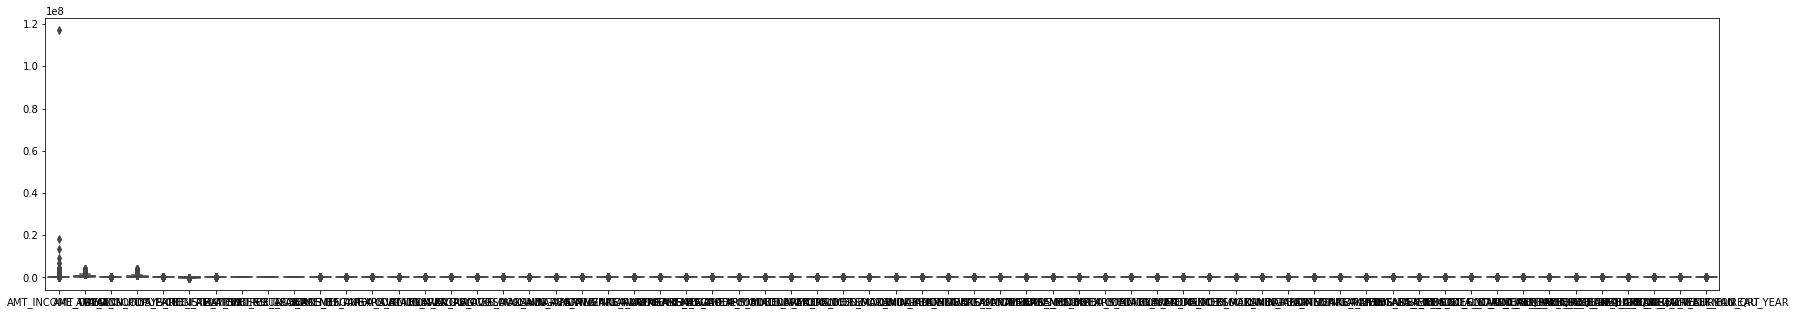

In [ ]:
plt.figure(figsize=(30,5))
sns.boxplot(data=data1.select_dtypes('float'))
plt.show()

Checking Distribution of variables using **Histogram** 

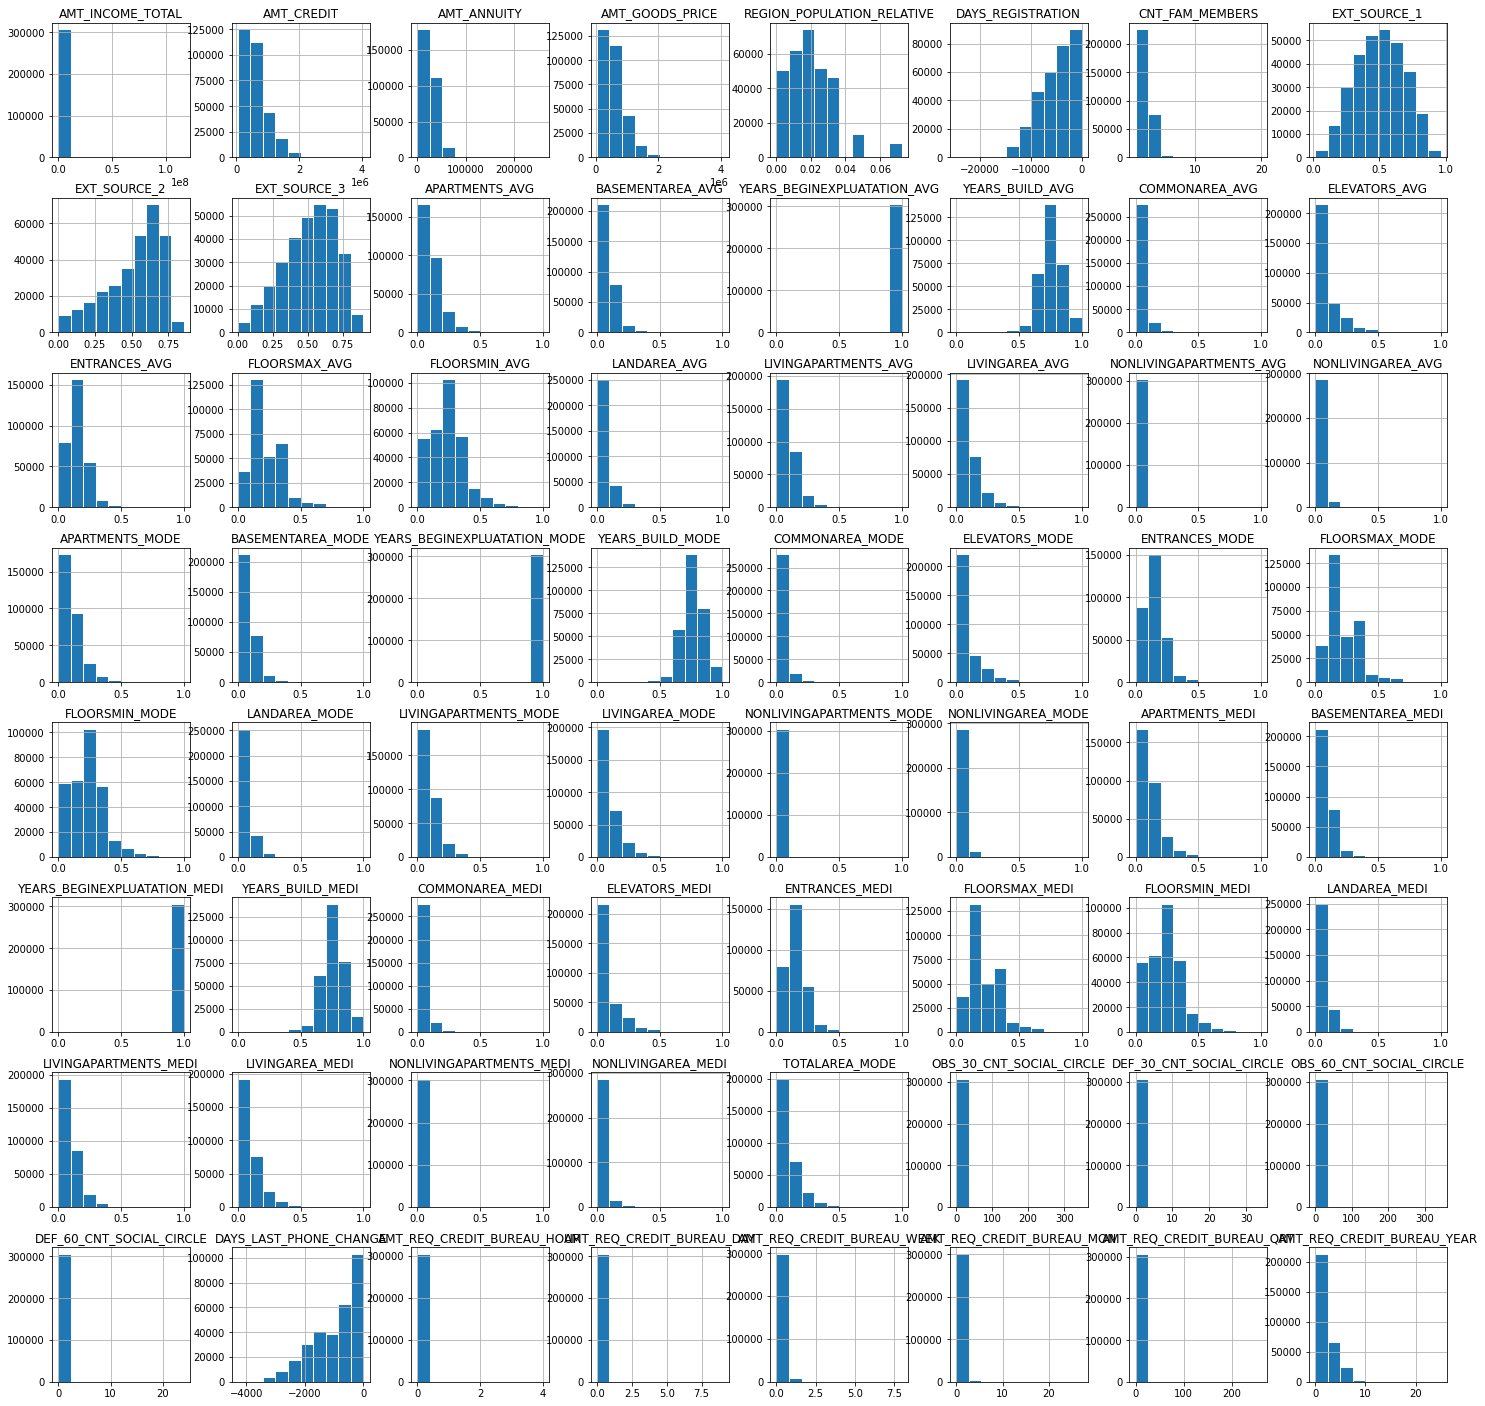

In [ ]:
data1.select_dtypes('float').hist(figsize=(25,25), ec='w')
plt.show()

Relation Between Variables

In [ ]:
def color_(value):
    if value < 0 :
        color = 'red'
    elif value == 1 :
        color = 'blue'
    else:
        color = 'green'
    return 'color: %s' % color
data1.select_dtypes('float').corr().style.applymap(color_)

In [ ]:
data1.select_dtypes('float').cov().style.applymap(color_)

In [ ]:
fraud = fraud.interpolate(method ='linear', limit_direction ='forward')
fraud = fraud.dropna(axis = 1)
missing(fraud)

,Total,Percentage


#Correlation of Variables with Class

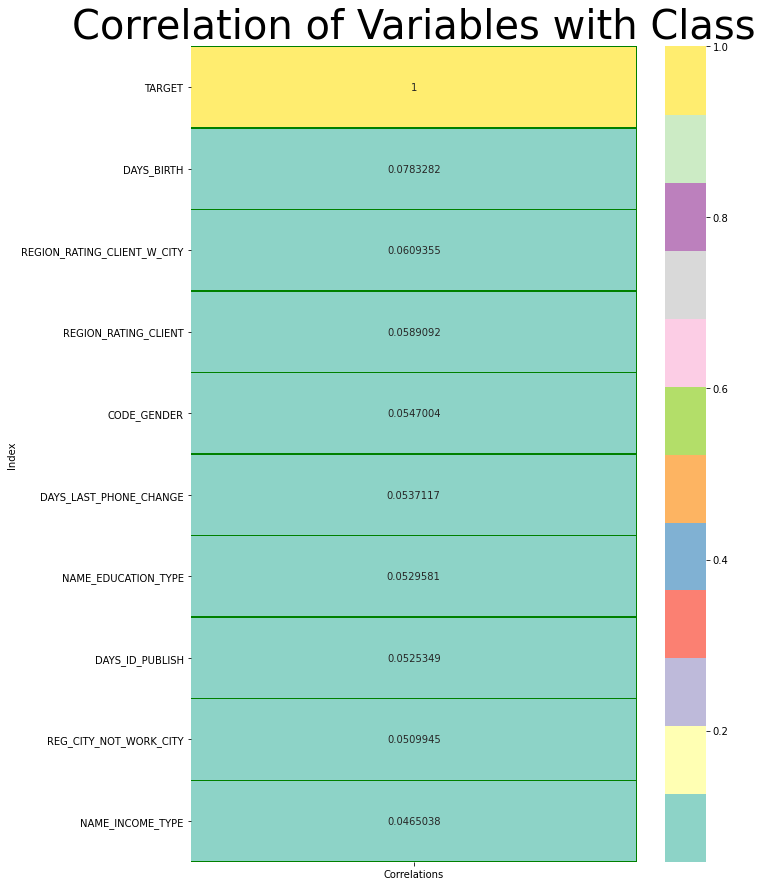

In [ ]:
corr = fraud.corrwith(fraud['TARGET'],method='spearman').reset_index()

corr.columns = ['Index','Correlations']
corr = corr.set_index('Index')
corr = corr.sort_values(by=['Correlations'], ascending = False).head(10)

plt.figure(figsize=(10, 15))
fig = sns.heatmap(corr, annot=True, fmt="g", cmap='Set3', linewidths=0.4, linecolor='green')

plt.title("Correlation of Variables with Class", fontsize=40)
plt.show()

#fraud vs. normal transactions 

In [ ]:
counts = fraud.TARGET.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))

There were 282686 non-fraudulent transactions (91.927%) and 24825 fraudulent transactions (8.073%).


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

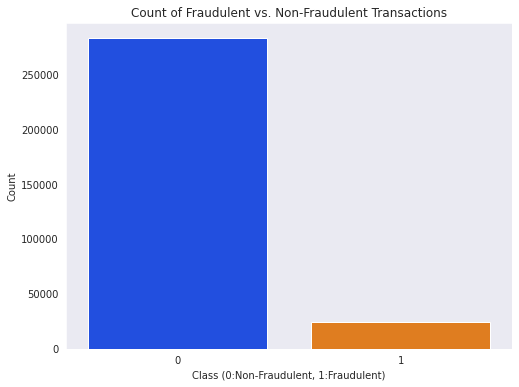

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

#heatmap

Text(0.5, 1.0, 'Heatmap of Correlation')

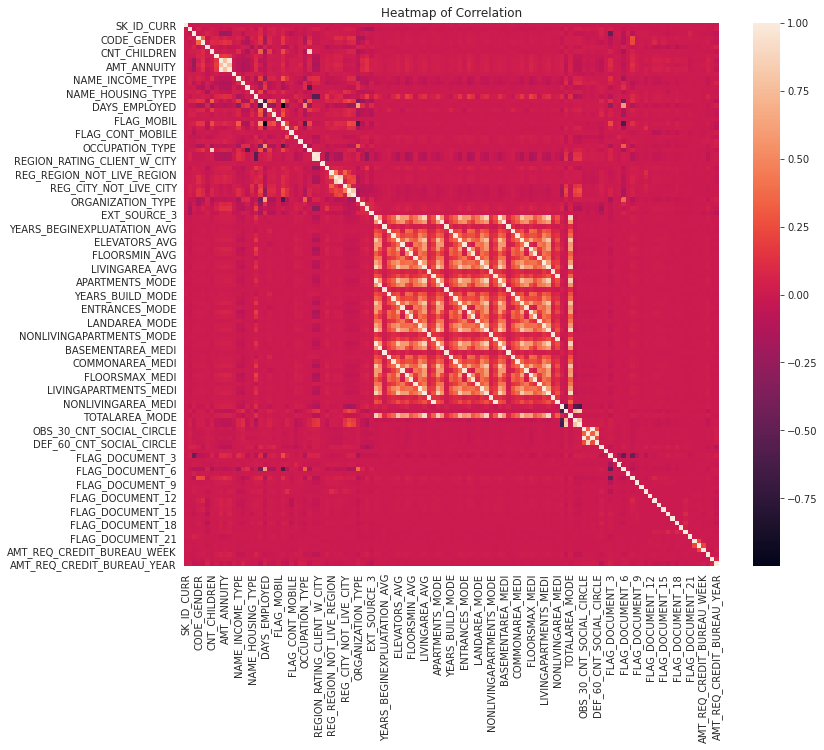

In [ ]:
corr = fraud.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

#**Building Classification Model**

In [ ]:
X = fraud.drop(['TARGET'],axis = 1)
Y = fraud['TARGET']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state = 0)

1. Logistic Regression
2. K-Nearest Classifier
3. Decision Tree
4. Naive Bayes

In [ ]:
def ml_model(X_train,X_test, Y_train, Y_test):
  MLA = [LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier(),GaussianNB()]
  MLA_columns = []
  MLA_compare = pd.DataFrame(columns = MLA_columns)
  row_index = 0
  for alg in MLA:
    predicted = alg.fit(X_train, Y_train).predict(X_test)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'Model Name'] = MLA_name
    MLA_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train, Y_train), 2)
    MLA_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test, Y_test), 2)
    MLA_compare.loc[row_index, 'Precision'] = round(precision_score(Y_test, predicted),2)
    MLA_compare.loc[row_index, 'Recall'] = round(recall_score(Y_test, predicted),2)
    MLA_compare.loc[row_index, 'F1 score'] = round(f1_score(Y_test, predicted),2)
    row_index+=1
  MLA_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    
  return MLA_compare  

In [ ]:
ml_model(X_train,X_test, Y_train, Y_test)

,Model Name,Train Accuracy,Test Accuracy,Precision,Recall,F1 score
0,LogisticRegression,0.92,0.92,0.00,0.00,0.00
1,KNeighborsClassifier,0.92,0.92,0.12,0.01,0.02
3,GaussianNB,0.91,0.91,0.06,0.01,0.01
2,DecisionTreeClassifier,1.00,0.85,0.13,0.16,0.15


**Applying Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
def ml_model2(X_train,X_test, Y_train, Y_test):
  MLA = [RandomForestClassifier(n_estimators=100, oob_score=True, n_jobs=4)]
  MLA_columns = []
  MLA_compare = pd.DataFrame(columns = MLA_columns)
  row_index = 0
  for alg in MLA:
    predicted = alg.fit(X_train, Y_train).predict(X_test)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'Model Name'] = MLA_name
    MLA_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train, Y_train), 2)
    MLA_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test, Y_test), 2)
    MLA_compare.loc[row_index, 'Precision'] = round(precision_score(Y_test, predicted),2)
    MLA_compare.loc[row_index, 'Recall'] = round(recall_score(Y_test, predicted),2)
    MLA_compare.loc[row_index, 'F1 score'] = round(f1_score(Y_test, predicted),2)
    row_index+=1
  MLA_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    
  return MLA_compare  

In [ ]:
ml_model2(X_train,X_test, Y_train, Y_test)

,Model Name,Train Accuracy,Test Accuracy,Precision,Recall,F1 score
0,RandomForestClassifier,1.0,0.92,1.0,0.0,0.0


**MULTI-LAYER PERCEPTRON**

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
def ml_model3(X_train,X_test, Y_train, Y_test):
  MLA = [MLPClassifier()]
  MLA_columns = []
  MLA_compare = pd.DataFrame(columns = MLA_columns)
  row_index = 0
  for alg in MLA:
    predicted = alg.fit(X_train, Y_train).predict(X_test)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'Model Name'] = MLA_name
    MLA_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train, Y_train), 2)
    MLA_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test, Y_test), 2)
    MLA_compare.loc[row_index, 'Precision'] = round(precision_score(Y_test, predicted),2)
    MLA_compare.loc[row_index, 'Recall'] = round(recall_score(Y_test, predicted),2)
    MLA_compare.loc[row_index, 'F1 score'] = round(f1_score(Y_test, predicted),2)
    row_index+=1
  MLA_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    
  return MLA_compare  

In [ ]:
ml_model3(X_train,X_test, Y_train, Y_test)

,Model Name,Train Accuracy,Test Accuracy,Precision,Recall,F1 score
0,MLPClassifier,0.92,0.92,0.0,0.0,0.0


**Support vector machine**

In [ ]:
from sklearn import svm

In [ ]:
def ml_model4(X_train,X_test, Y_train, Y_test):
  MLA = [svm.LinearSVC()]
  MLA_columns = []
  MLA_compare = pd.DataFrame(columns = MLA_columns)
  row_index = 0
  for alg in MLA:
    predicted = alg.fit(X_train, Y_train).predict(X_test)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'Model Name'] = MLA_name
    MLA_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train, Y_train), 2)
    MLA_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test, Y_test), 2)
    MLA_compare.loc[row_index, 'Precision'] = round(precision_score(Y_test, predicted),2)
    MLA_compare.loc[row_index, 'Recall'] = round(recall_score(Y_test, predicted),2)
    MLA_compare.loc[row_index, 'F1 score'] = round(f1_score(Y_test, predicted),2)
    row_index+=1
  MLA_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    
  return MLA_compare  

In [ ]:
ml_model4(X_train,X_test, Y_train, Y_test)

,Model Name,Train Accuracy,Test Accuracy,Precision,Recall,F1 score
0,LinearSVC,0.9,0.9,0.08,0.02,0.03


#Selecting 20 best features and apply the model on the feature

In [ ]:
from sklearn.feature_selection import SelectKBest,mutual_info_classif
bestfeatures = SelectKBest(score_func=mutual_info_classif, k=20)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns) 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score'] 
print(featureScores.nlargest(20,'Score')) 

                        Feature     Score
19                   FLAG_MOBIL  0.065781
22             FLAG_CONT_MOBILE  0.064850
20               FLAG_EMP_PHONE  0.043878
11          NAME_EDUCATION_TYPE  0.043774
13            NAME_HOUSING_TYPE  0.041062
27  REGION_RATING_CLIENT_W_CITY  0.039689
26         REGION_RATING_CLIENT  0.039036
52              FLAG_DOCUMENT_3  0.033848
4               FLAG_OWN_REALTY  0.030956
10             NAME_INCOME_TYPE  0.023887
12           NAME_FAMILY_STATUS  0.022450
25              CNT_FAM_MEMBERS  0.020013
16                DAYS_EMPLOYED  0.016007
8                   AMT_ANNUITY  0.012324
37                 EXT_SOURCE_2  0.012013
38                 EXT_SOURCE_3  0.011803
28   WEEKDAY_APPR_PROCESS_START  0.009486
3                  FLAG_OWN_CAR  0.008728
2                   CODE_GENDER  0.008503
36            ORGANIZATION_TYPE  0.008255


**apply all the model after feature selection **

In [ ]:
X = fraud[['FLAG_CONT_MOBILE','FLAG_MOBIL','FLAG_EMP_PHONE','NAME_TYPE_SUITE','NAME_EDUCATION_TYPE','NAME_HOUSING_TYPE','REGION_RATING_CLIENT_W_CITY','REGION_RATING_CLIENT',
         'FLAG_DOCUMENT_3','FLAG_OWN_REALTY','AMT_ANNUITY','EXT_SOURCE_2','DAYS_EMPLOYED','HOUSETYPE_MODE','OCCUPATION_TYPE','CNT_FAM_MEMBERS','WALLSMATERIAL_MODE','NAME_FAMILY_STATUS','NAME_INCOME_TYPE','EMERGENCYSTATE_MODE']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3, random_state = 0)
Feature_selection = ml_model2(X_train,X_test, Y_train, Y_test)
Feature_selection

,Model Name,Train Accuracy,Test Accuracy,Precision,Recall,F1 score
0,RandomForestClassifier,1.0,0.92,0.32,0.01,0.01


In [ ]:
X = fraud[['FLAG_CONT_MOBILE','FLAG_MOBIL','FLAG_EMP_PHONE','NAME_TYPE_SUITE','NAME_EDUCATION_TYPE','NAME_HOUSING_TYPE','REGION_RATING_CLIENT_W_CITY','REGION_RATING_CLIENT',
         'FLAG_DOCUMENT_3','FLAG_OWN_REALTY','AMT_ANNUITY','EXT_SOURCE_2','DAYS_EMPLOYED','HOUSETYPE_MODE','OCCUPATION_TYPE','CNT_FAM_MEMBERS','WALLSMATERIAL_MODE','NAME_FAMILY_STATUS','NAME_INCOME_TYPE','EMERGENCYSTATE_MODE']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3, random_state = 0)
Feature_selection = ml_model(X_train,X_test, Y_train, Y_test)
Feature_selection

,Model Name,Train Accuracy,Test Accuracy,Precision,Recall,F1 score
0,LogisticRegression,0.92,0.92,0.00,0.00,0.00
3,GaussianNB,0.92,0.92,0.00,0.00,0.00
1,KNeighborsClassifier,0.92,0.91,0.12,0.01,0.02
2,DecisionTreeClassifier,1.00,0.85,0.12,0.14,0.12


In [ ]:
X = fraud[['FLAG_CONT_MOBILE','FLAG_MOBIL','FLAG_EMP_PHONE','NAME_TYPE_SUITE','NAME_EDUCATION_TYPE','NAME_HOUSING_TYPE','REGION_RATING_CLIENT_W_CITY','REGION_RATING_CLIENT',
         'FLAG_DOCUMENT_3','FLAG_OWN_REALTY','AMT_ANNUITY','EXT_SOURCE_2','DAYS_EMPLOYED','HOUSETYPE_MODE','OCCUPATION_TYPE','CNT_FAM_MEMBERS','WALLSMATERIAL_MODE','NAME_FAMILY_STATUS','NAME_INCOME_TYPE','EMERGENCYSTATE_MODE']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3, random_state = 0)
Feature_selection = ml_model3(X_train,X_test, Y_train, Y_test)
Feature_selection

,Model Name,Train Accuracy,Test Accuracy,Precision,Recall,F1 score
0,MLPClassifier,0.92,0.92,0.0,0.0,0.0


In [ ]:
X = fraud[['FLAG_CONT_MOBILE','FLAG_MOBIL','FLAG_EMP_PHONE','NAME_TYPE_SUITE','NAME_EDUCATION_TYPE','NAME_HOUSING_TYPE','REGION_RATING_CLIENT_W_CITY','REGION_RATING_CLIENT',
         'FLAG_DOCUMENT_3','FLAG_OWN_REALTY','AMT_ANNUITY','EXT_SOURCE_2','DAYS_EMPLOYED','HOUSETYPE_MODE','OCCUPATION_TYPE','CNT_FAM_MEMBERS','WALLSMATERIAL_MODE','NAME_FAMILY_STATUS','NAME_INCOME_TYPE','EMERGENCYSTATE_MODE']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3, random_state = 0)
Feature_selection = ml_model4(X_train,X_test, Y_train, Y_test)
Feature_selection

,Model Name,Train Accuracy,Test Accuracy,Precision,Recall,F1 score
0,LinearSVC,0.76,0.76,0.05,0.12,0.08


**PCA**--- For Anomal Detection

Principal Component Analysis (PCA) is an unsupervised method for taking a data set where features have multi-collinearity and creating a decorrelated data set, by finding the linear combination of vectors which maximize the data's variances in orthogonal dimensions.

In [ ]:
# Principal Component Analysis
from sklearn.decomposition import PCA

In [ ]:
X_train = np.array(X_train).tolist()

#Data Imbalance-Over Sampling

In [ ]:
print('before Oversampling:',Counter(Y_train))
oversample = RandomOverSampler(sampling_strategy='minority')
X_train1, Y_train1 = oversample.fit_resample(X_train, Y_train)
print('After Oversampling:',Counter(Y_train1))

before Oversampling: Counter({0: 226038, 1: 19970})
After Oversampling: Counter({0: 226038, 1: 226038})


Counter({'SK_ID_CURR': 1, 'TARGET': 1, 'NAME_CONTRACT_TYPE': 1, 'CODE_GENDER': 1, 'FLAG_OWN_CAR': 1, 'FLAG_OWN_REALTY': 1, 'CNT_CHILDREN': 1, 'AMT_INCOME_TOTAL': 1, 'AMT_CREDIT': 1, 'AMT_ANNUITY': 1, 'AMT_GOODS_PRICE': 1, 'NAME_TYPE_SUITE': 1, 'NAME_INCOME_TYPE': 1, 'NAME_EDUCATION_TYPE': 1, 'NAME_FAMILY_STATUS': 1, 'NAME_HOUSING_TYPE': 1, 'REGION_POPULATION_RELATIVE': 1, 'DAYS_BIRTH': 1, 'DAYS_EMPLOYED': 1, 'DAYS_REGISTRATION': 1, 'DAYS_ID_PUBLISH': 1, 'FLAG_MOBIL': 1, 'FLAG_EMP_PHONE': 1, 'FLAG_WORK_PHONE': 1, 'FLAG_CONT_MOBILE': 1, 'FLAG_PHONE': 1, 'FLAG_EMAIL': 1, 'OCCUPATION_TYPE': 1, 'CNT_FAM_MEMBERS': 1, 'REGION_RATING_CLIENT': 1, 'REGION_RATING_CLIENT_W_CITY': 1, 'WEEKDAY_APPR_PROCESS_START': 1, 'HOUR_APPR_PROCESS_START': 1, 'REG_REGION_NOT_LIVE_REGION': 1, 'REG_REGION_NOT_WORK_REGION': 1, 'LIVE_REGION_NOT_WORK_REGION': 1, 'REG_CITY_NOT_LIVE_CITY': 1, 'REG_CITY_NOT_WORK_CITY': 1, 'LIVE_CITY_NOT_WORK_CITY': 1, 'ORGANIZATION_TYPE': 1, 'EXT_SOURCE_1': 1, 'EXT_SOURCE_2': 1, 'EXT_SO

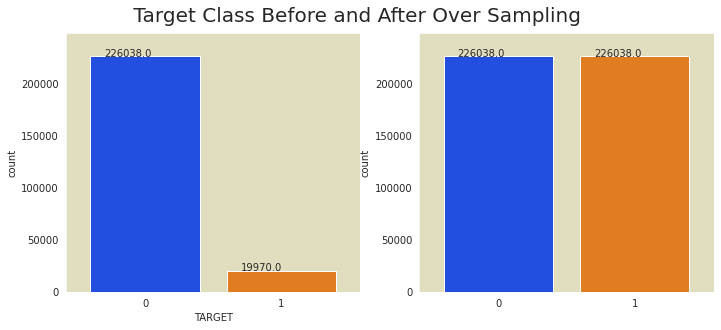

In [ ]:
print(Counter(fraud))
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,4.5))
fig.subplots_adjust(bottom=0.10, left=0.10, top = 0.900, right=1.00)
fig.suptitle(' Target Class Before and After Over Sampling', fontsize = 20)
sns.set_palette("bright")
sns.countplot(Y_train, ax=ax1)
ax1.margins(0.1)
ax1.set_facecolor("#e1ddbf")
for p in ax1.patches:
        ax1.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
sns.set_palette("bright")
sns.countplot(Y_train1, ax=ax2)
ax2.margins(0.1)
ax2.set_facecolor("#e1ddbf")
for p in ax2.patches:
        ax2.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
sns.set_style('dark')

In [ ]:
oversampling = ml_model(X_train1,X_test, Y_train1, Y_test)
oversampling

,Model Name,Train Accuracy,Test Accuracy,Precision,Recall,F1 score
3,GaussianNB,0.50,0.90,0.07,0.02,0.03
2,DecisionTreeClassifier,1.00,0.86,0.14,0.15,0.14
1,KNeighborsClassifier,0.92,0.74,0.09,0.26,0.14
0,LogisticRegression,0.57,0.59,0.11,0.58,0.18


In [ ]:
oversampling = ml_model2(X_train1,X_test, Y_train1, Y_test)
oversampling

,Model Name,Train Accuracy,Test Accuracy,Precision,Recall,F1 score
0,RandomForestClassifier,1.0,0.92,0.34,0.0,0.01


In [ ]:
oversampling = ml_model3(X_train1,X_test, Y_train1, Y_test)
oversampling

,Model Name,Train Accuracy,Test Accuracy,Precision,Recall,F1 score
0,MLPClassifier,0.5,0.92,0.0,0.0,0.0


In [ ]:
oversampling = ml_model4(X_train1,X_test, Y_train1, Y_test)
oversampling

,Model Name,Train Accuracy,Test Accuracy,Precision,Recall,F1 score
0,LinearSVC,0.51,0.13,0.08,0.97,0.15


#SMOTE SAMPLING ON DIFFRENT MODEL

SMOTE is a technique that generates new observations by interpolating between observations in the original dataset.Implementing SMOTE on our imbalanced dataset helped us with the imbalance of our labels (more no fraud than fraud transactions).


In [ ]:
print('before SMOTE:',Counter(Y_train))
sm = SMOTE(sampling_strategy='minority')
X_train2, Y_train2 = sm.fit_resample(X_train, Y_train)
print('After SMOTE:',Counter(Y_train2))

before SMOTE: Counter({0: 226038, 1: 19970})
After SMOTE: Counter({0: 226038, 1: 226038})


In [ ]:
Smote = ml_model(X_train2,X_test, Y_train2, Y_test)
Smote

,Model Name,Train Accuracy,Test Accuracy,Precision,Recall,F1 score
2,DecisionTreeClassifier,1.00,0.84,0.13,0.18,0.15
3,GaussianNB,0.58,0.82,0.12,0.21,0.15
1,KNeighborsClassifier,0.89,0.68,0.09,0.34,0.15
0,LogisticRegression,0.58,0.61,0.11,0.56,0.18


In [ ]:
Smote = ml_model2(X_train2,X_test, Y_train2, Y_test)
Smote

,Model Name,Train Accuracy,Test Accuracy,Precision,Recall,F1 score
0,RandomForestClassifier,1.0,0.92,0.5,0.0,0.0


In [ ]:
Smote = ml_model3(X_train2,X_test, Y_train2, Y_test)
Smote

,Model Name,Train Accuracy,Test Accuracy,Precision,Recall,F1 score
0,MLPClassifier,0.5,0.92,0.0,0.0,0.0


In [ ]:
Smote = ml_model4(X_train2,X_test, Y_train2, Y_test)
Smote

,Model Name,Train Accuracy,Test Accuracy,Precision,Recall,F1 score
0,LinearSVC,0.5,0.9,0.09,0.03,0.04


#Ensembling

In [ ]:
!pip install catboost

     |████████████████████████████████| 66.3MB 75kB/s 


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier  
from catboost import CatBoostClassifier

In [ ]:
    !apt-get -qq install --no-install-recommends nvidia-375
    !apt-get -qq install --no-install-recommends nvidia-opencl-icd-375 nvidia-opencl-dev opencl-headers
    !apt-get -qq install --no-install-recommends git cmake build-essential libboost-dev libboost-system-dev libboost-filesystem-dev
    !pip3 install -qq lightgbm --install-option=--gpu

Selecting previously unselected package nvidia-driver-430.
(Reading database ... 145480 files and directories currently installed.)
Preparing to unpack .../nvidia-driver-430_460.27.04-0ubuntu1_amd64.deb ...
Unpacking nvidia-driver-430 (460.27.04-0ubuntu1) ...
Selecting previously unselected package nvidia-driver-418.
Preparing to unpack .../nvidia-driver-418_430.64-0ubuntu0~gpu18.04.1_amd64.deb ...
Unpacking nvidia-driver-418 (430.64-0ubuntu0~gpu18.04.1) ...
Selecting previously unselected package nvidia-384.
Preparing to unpack .../nvidia-384_418.165.02-0ubuntu1_amd64.deb ...
Unpacking nvidia-384 (418.165.02-0ubuntu1) ...
Selecting previously unselected package nvidia-375.
Preparing to unpack .../nvidia-375_384.111-0ubuntu1_amd64.deb ...
Unpacking nvidia-375 (384.111-0ubuntu1) ...
Setting up nvidia-driver-430 (460.27.04-0ubuntu1) ...
Setting up nvidia-driver-418 (430.64-0ubuntu0~gpu18.04.1) ...
Setting up nvidia-384 (418.165.02-0ubuntu1) ...
Setting up nvidia-375 (384.111-0ubuntu1) ..

In [ ]:
!git clone --recursive https://github.com/Microsoft/LightGBM
%cd LightGBM
!mkdir build
%cd build
!cmake ../../LightGBM
!make -j4

Cloning into 'LightGBM'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 20643 (delta 5), reused 9 (delta 2), pack-reused 20614
Receiving objects: 100% (20643/20643), 16.23 MiB | 29.78 MiB/s, done.
Resolving deltas: 100% (15053/15053), done.
Submodule 'include/boost/compute' (https://github.com/boostorg/compute) registered for path 'compute'
Submodule 'eigen' (https://gitlab.com/libeigen/eigen.git) registered for path 'eigen'
Submodule 'external_libs/fast_double_parser' (https://github.com/lemire/fast_double_parser.git) registered for path 'external_libs/fast_double_parser'
Submodule 'external_libs/fmt' (https://github.com/fmtlib/fmt.git) registered for path 'external_libs/fmt'
Cloning into '/content/LightGBM/build/LightGBM/compute'...
remote: Enumerating objects: 21728, done.        
remote: Total 21728 (delta 0), reused 0 (delta 0), pack-reused 21728        
Receiving objects: 100% (

In [ ]:
%cd LightGBM/python-package
!python3 setup.py install --gpu

In [ ]:
!pip install cmake

In [ ]:
def ensemble_model(X_train,X_test, Y_train, Y_test):
  class_weight={0:0.087, 1:1}
  MLA = [CatBoostClassifier(iterations=200, learning_rate=0.3,random_seed=42,verbose=False),XGBClassifier(n_estimators=200,learning_rate=0.1
                                                                                                          ,random_state=42),LGBMClassifier(n_estimators=200,is_unbalance=True,learning_rate=0.1,
     class_weight=class_weight,num_leaves=200,random_state=42,n_jobs=-1)]
  MLA_columns = []
  MLA_compare = pd.DataFrame(columns = MLA_columns)
  row_index = 0
  for alg in MLA:
    predicted = alg.fit(X_train, Y_train).predict(X_test)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'Model Name'] = MLA_name
    MLA_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train, Y_train), 2)
    MLA_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test, Y_test), 2)
    MLA_compare.loc[row_index, 'Precision'] = round(precision_score(Y_test, predicted),2)
    MLA_compare.loc[row_index, 'Recall'] = round(recall_score(Y_test, predicted),2)
    MLA_compare.loc[row_index, 'F1 score'] = round(f1_score(Y_test, predicted),2)
    row_index+=1
  MLA_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    
  return MLA_compare  
ensemble_model(X_train,X_test, Y_train, Y_test)

,Model Name,Train Accuracy,Test Accuracy,Precision,Recall,F1 score
0,CatBoostClassifier,0.92,0.92,0.37,0.01,0.01
1,XGBClassifier,0.92,0.92,0.55,0.00,0.00
2,LGBMClassifier,0.41,0.37,0.10,0.82,0.17


#Apply Neural Network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [ ]:
X = fraud.drop(['TARGET'],axis = 1)
Y = fraud['TARGET']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state = 0)

In [ ]:
# We are transforming data to numpy array to implementing with keras
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

In [ ]:
model_Neural = Sequential([
    Dense(units=20, input_dim = X_train.shape[1], activation='relu'),
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(units=20,activation='relu'),
    Dense(units=24,activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
model_Neural.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 20)                2420      
_________________________________________________________________
dense_6 (Dense)              (None, 24)                504       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_8 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 25        
Total params: 3,953
Trainable params: 3,953
Non-trainable params: 0
____________________________________________________

In [ ]:
model_Neural.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_Neural.fit(X_train, Y_train, batch_size=30, epochs=10)

Epoch 1/10
8201/8201 [==============================] - 22s 3ms/step - loss: 233.6127 - accuracy: 0.8879
Epoch 2/10
8201/8201 [==============================] - 21s 3ms/step - loss: 0.2930 - accuracy: 0.9196
Epoch 3/10
8201/8201 [==============================] - 21s 3ms/step - loss: 0.2812 - accuracy: 0.9191
Epoch 4/10
8201/8201 [==============================] - 20s 2ms/step - loss: 0.2824 - accuracy: 0.9186
Epoch 5/10
8201/8201 [==============================] - 20s 2ms/step - loss: 0.2823 - accuracy: 0.9187
Epoch 6/10
8201/8201 [==============================] - 20s 2ms/step - loss: 0.2840 - accuracy: 0.9179
Epoch 7/10
8201/8201 [==============================] - 20s 2ms/step - loss: 0.2797 - accuracy: 0.9197
Epoch 8/10
8201/8201 [==============================] - 20s 2ms/step - loss: 0.2830 - accuracy: 0.9184
Epoch 9/10
8201/8201 [==============================] - 21s 3ms/step - loss: 0.2824 - accuracy: 0.9185
Epoch 10/10
8201/8201 [==============================] - 20s 2ms/step -

In [ ]:
score = model_Neural.evaluate(X_test, Y_test)
print('Test Accuracy: {:.2f}%\nTest Loss: {}'.format(score[1]*100,score[0]))

1922/1922 [==============================] - 3s 2ms/step - loss: 0.2816 - accuracy: 0.9211
Test Accuracy: 92.11%
Test Loss: 0.2815752923488617


In [ ]:
!pip install -q ann_visualizer

In [ ]:
from ann_visualizer.visualize import ann_viz

ann_viz(model_Neural, title="Artificial Neural network - Model Visualization")

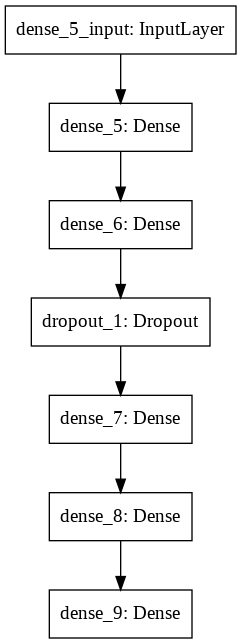

In [ ]:
from keras.utils import plot_model
plot_model(model_Neural, to_file='model.png')

Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

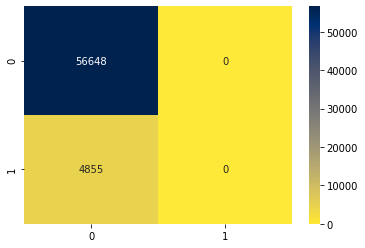

In [ ]:
y_pred = model_Neural.predict(X_test)
y_test = pd.DataFrame(Y_test)
cm = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm, annot=True, fmt='.0f', cmap='cividis_r')
plt.show()

#SMOTE Sampling on neural network

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
X_smote, y_smote = SMOTE().fit_sample(X, Y)
X_smote = pd.DataFrame(X_smote)
y_smote = pd.DataFrame(y_smote)
y_smote.iloc[:,0].value_counts()

1    282686
0    282686
Name: 0, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=0)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
model_Neural.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_Neural.fit(X_train, y_train, batch_size = 30, epochs = 5)

Epoch 1/5
15077/15077 [==============================] - 38s 3ms/step - loss: 0.7125 - accuracy: 0.5013
Epoch 2/5
15077/15077 [==============================] - 38s 2ms/step - loss: 0.6933 - accuracy: 0.5019
Epoch 3/5
15077/15077 [==============================] - 37s 2ms/step - loss: 0.6933 - accuracy: 0.5006
Epoch 4/5
15077/15077 [==============================] - 37s 2ms/step - loss: 0.6934 - accuracy: 0.4998
Epoch 5/5
15077/15077 [==============================] - 37s 2ms/step - loss: 0.6933 - accuracy: 0.4991


In [ ]:
score = model_Neural.evaluate(X_test, y_test)
print('Test Accuracy: {:.2f}%\nTest Loss: {}'.format(score[1]*100,score[0]))

1922/1922 [==============================] - 4s 2ms/step - loss: 0.2816 - accuracy: 0.9211
Test Accuracy: 92.11%
Test Loss: 0.2815752923488617


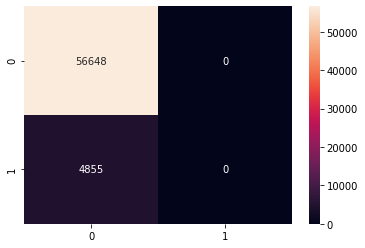

In [ ]:
y_pred = model_Neural.predict(X_test)
y_test = pd.DataFrame(y_test)
cm = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm, annot=True, fmt='.0f')
plt.show()

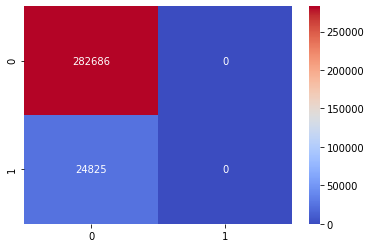

In [ ]:
y_pred2 = model_Neural.predict(X)
y_test2 = pd.DataFrame(Y)
cm2 = confusion_matrix(y_test2, y_pred2.round())
sns.heatmap(cm2, annot=True, fmt='.0f', cmap='coolwarm')
plt.show()

In [ ]:
scoreNew = model_Neural.evaluate(X, Y)
print('Test Accuracy: {:.2f}%\nTest Loss: {}'.format(scoreNew[1]*100,scoreNew[0]))

9610/9610 [==============================] - 19s 2ms/step - loss: 0.2816 - accuracy: 0.9193
Test Accuracy: 91.93%
Test Loss: 0.2816195785999298


In [ ]:
print(classification_report(y_test2, y_pred2.round()))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96    282686
           1       0.00      0.00      0.00     24825

    accuracy                           0.92    307511
   macro avg       0.46      0.50      0.48    307511
weighted avg       0.85      0.92      0.88    307511



# Droping Null value where missing ratio is 50

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 100)

In [ ]:
fraud_drop = pd.read_csv('/content/gdrive/MyDrive/application_data.csv')

In [ ]:
drop_cols=fraud_drop.isnull().sum()
drop_cols=drop_cols[drop_cols.values>(0.50*len(fraud_drop))] # checking columns having null values for more than 50%
len(drop_cols)


41

In [ ]:
drop_cols.values

array([202929, 173378, 156061, 179943, 204488, 214865, 163891, 154828,
       208642, 182590, 210199, 154350, 213514, 169682, 156061, 179943,
       204488, 214865, 163891, 154828, 208642, 182590, 210199, 154350,
       213514, 169682, 156061, 179943, 204488, 214865, 163891, 154828,
       208642, 182590, 210199, 154350, 213514, 169682, 210295, 154297,
       156341])

In [ ]:
drop_cols= list(drop_cols[drop_cols.values>=0.50].index)
fraud_drop.drop(labels=drop_cols,axis=1,inplace=True)
drop_cols

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE']

In [ ]:
fraud_drop.shape 

(307511, 81)

In [ ]:
print("float type values:",np.count_nonzero(fraud_drop.select_dtypes('float').columns))
print("")
print(fraud_drop.select_dtypes('float').columns)

float type values: 27

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG',
       'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')


In [ ]:
missing(fraud_drop.select_dtypes('float'))

,Total,Percentage
FLOORSMAX_AVG,153020,49.760822
FLOORSMAX_MODE,153020,49.760822
FLOORSMAX_MEDI,153020,49.760822
YEARS_BEGINEXPLUATATION_MEDI,150007,48.781019
YEARS_BEGINEXPLUATATION_AVG,150007,48.781019
YEARS_BEGINEXPLUATATION_MODE,150007,48.781019
TOTALAREA_MODE,148431,48.268517
EXT_SOURCE_3,60965,19.825307
AMT_REQ_CREDIT_BUREAU_QRT,41519,13.501631
AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.501631


In [ ]:
data1 = fraud_drop.select_dtypes('float').interpolate(method ='linear', limit_direction ='forward')
missing(fraud_drop.select_dtypes('float'))

,Total,Percentage
FLOORSMAX_AVG,153020,49.760822
FLOORSMAX_MODE,153020,49.760822
FLOORSMAX_MEDI,153020,49.760822
YEARS_BEGINEXPLUATATION_MEDI,150007,48.781019
YEARS_BEGINEXPLUATATION_AVG,150007,48.781019
YEARS_BEGINEXPLUATATION_MODE,150007,48.781019
TOTALAREA_MODE,148431,48.268517
EXT_SOURCE_3,60965,19.825307
AMT_REQ_CREDIT_BUREAU_QRT,41519,13.501631
AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.501631


In [ ]:
data1 = data1.dropna(axis = 1)
missing(data1)

,Total,Percentage


In [ ]:
fraud_drop = fraud_drop.interpolate(method ='linear', limit_direction ='forward')
fraud_drop = fraud_drop.dropna(axis = 1)
missing(fraud_drop)

,Total,Percentage


In [ ]:
print("Int type values:",np.count_nonzero(fraud_drop.select_dtypes('int').columns))
print(" ")
print(fraud_drop.select_dtypes('int').columns)

Int type values: 41
 
Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21'],
      dtype='object')


In [ ]:
print("Object type values:",np.count_nonzero(fraud_drop.select_dtypes('object').columns))
print("")
print(fraud_drop.select_dtypes('object').columns)

Object type values: 10

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')


In [ ]:
le = LabelEncoder()
fraud_drop['NAME_CONTRACT_TYPE'] = le.fit_transform(fraud_drop['NAME_CONTRACT_TYPE'])
fraud_drop['CODE_GENDER'] = le.fit_transform(fraud_drop['CODE_GENDER'])
fraud_drop['FLAG_OWN_CAR'] = le.fit_transform(fraud_drop['FLAG_OWN_CAR'])
fraud_drop['FLAG_OWN_REALTY'] = le.fit_transform(fraud['FLAG_OWN_REALTY'])
fraud_drop['NAME_INCOME_TYPE'] = le.fit_transform(fraud_drop['NAME_INCOME_TYPE'])
fraud_drop['NAME_EDUCATION_TYPE'] = le.fit_transform(fraud_drop['NAME_EDUCATION_TYPE'])
fraud_drop['NAME_FAMILY_STATUS'] = le.fit_transform(fraud_drop['NAME_FAMILY_STATUS'])
fraud_drop['NAME_HOUSING_TYPE'] = le.fit_transform(fraud_drop['NAME_HOUSING_TYPE'])
fraud_drop['WEEKDAY_APPR_PROCESS_START'] = le.fit_transform(fraud_drop['WEEKDAY_APPR_PROCESS_START'])
fraud_drop['ORGANIZATION_TYPE'] = le.fit_transform(fraud_drop['ORGANIZATION_TYPE'])

In [ ]:
def colors(value):
    if value > 50 and value < 100:
        color = 'red'
    elif value > 154000 and value < 250000:
        color = 'red'
    elif value == 1 :
        color = 'blue'
    else:
        color = 'green'
    return 'color: %s' % color

def missing(fraud_drop):
    total = fraud_drop.isnull().sum().sort_values(ascending = False)
    total = total[total>0]
    percent = fraud_drop.isnull().sum().sort_values(ascending = False)/len(fraud_drop)*100
    percent = percent[percent>0]
    return pd.concat([total, percent], axis=1, keys=['Total','Percentage']).style.applymap(colors)
missing(fraud_drop.select_dtypes('object'))

,Total,Percentage


In [ ]:
X = fraud_drop.drop(['TARGET'],axis = 1)
Y = fraud_drop['TARGET']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state = 0)

In [ ]:
def ml_model(X_train,X_test, Y_train, Y_test):
  MLA = [LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier(),GaussianNB()]
  MLA_columns = []
  MLA_compare = pd.DataFrame(columns = MLA_columns)
  row_index = 0
  for alg in MLA:
    predicted = alg.fit(X_train, Y_train).predict(X_test)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'Model Name'] = MLA_name
    MLA_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train, Y_train), 2)
    MLA_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test, Y_test), 2)
    MLA_compare.loc[row_index, 'Precision'] = round(precision_score(Y_test, predicted),2)
    MLA_compare.loc[row_index, 'Recall'] = round(recall_score(Y_test, predicted),2)
    MLA_compare.loc[row_index, 'F1 score'] = round(f1_score(Y_test, predicted),2)
    row_index+=1
  MLA_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    
  return MLA_compare  

In [ ]:
ml_model(X_train,X_test, Y_train, Y_test)

,Model Name,Train Accuracy,Test Accuracy,Precision,Recall,F1 score
0,LogisticRegression,0.92,0.92,0.00,0.00,0.00
1,KNeighborsClassifier,0.92,0.92,0.12,0.01,0.02
3,GaussianNB,0.91,0.91,0.06,0.01,0.01
2,DecisionTreeClassifier,1.00,0.85,0.13,0.15,0.14
